<a href="https://colab.research.google.com/github/andrewputrahartanto/Proyek_Analisis_Data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andrew Putra Hartanto
- **Email:** andrewputrahartanto@gmail.com
- **ID Dicoding:** andrew_p_h_26

## Menentukan Pertanyaan Bisnis

- Bagaimana Perbandingan Pengguna Bike Sharing Pada Tahun 2011 dan 2012?
- Bagaimana Tren Pengguna Bike Sharing Setiap Bulan?
- Bagaimana Traffic Pengguna Bike Sharing Setiap Jam?
- Bagaimana Komposisi Tipe Pengguna Bike Sharing?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tabel Day

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/andrewputrahartanto/Proyek_Analisis_Data/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Tabel hour

In [5]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/andrewputrahartanto/Proyek_Analisis_Data/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel Day

Cek Tipe Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek Missing Value

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Duplikasi Data

In [8]:
print("Number of duplicates: ", day_df.duplicated().sum())

Number of duplicates:  0


Cek Parameter Statistik

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel Hour

Cek Tipe Data

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek Missing Value

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Duplikasi Data

In [12]:
print("Number of duplicates: ", hour_df.duplicated().sum())

Number of duplicates:  0


Cek Parameter Statistik

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan Tabel Day

Memperbaiki Tipe Data

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan Tabel Hour

Memperbaiki Tipe Data

In [16]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Day

In [18]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
75,76,2011-03-17,1,0,3,0,4,1,1,0.415000,0.410333,0.602917,0.209579,424,2320,2744
323,324,2011-11-20,4,0,11,0,0,0,2,0.463333,0.457058,0.684583,0.185950,787,2733,3520
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
700,701,2012-12-01,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,951,4240,5191
493,494,2012-05-08,2,1,5,0,2,1,2,0.581667,0.557471,0.685833,0.296029,738,4990,5728


In [19]:
day_df.describe(include="all")

<ipython-input-19-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Group by Season

In [20]:
# 1: Springer
# 2: Summer
# 3: Fall
# 4: Winter
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Group by Year

In [21]:
# 0: 2011
# 1: 2012
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

Group by Month

In [22]:
# 1: Januari
# 2: Februari
# 3: Maret
# 4: April
# 5: Mei
# 6: Juni
# 7: Juli
# 8: Agustus
# 9: September
# 10: Oktober
# 11: November
# 12: Desember
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

Group by Day

In [23]:
# 0: Minggu
# 1: Senin
# 2: Selasa
# 3: Rabu
# 4: Kamis
# 5: Jumat
# 6: Sabtu
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

### Explore Hour

In [24]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14754,14755,2012-09-11,3,1,9,23,0,2,1,1,0.54,0.5152,0.68,0.1045,18,91,109
2751,2752,2011-04-29,2,0,4,13,0,5,1,1,0.56,0.5303,0.37,0.2985,74,234,308
1961,1962,2011-03-27,2,0,3,13,0,0,0,1,0.30,0.2879,0.39,0.2239,47,100,147
5407,5408,2011-08-18,3,0,8,5,0,4,1,1,0.64,0.5909,0.78,0.2836,0,27,27
2948,2949,2011-05-07,2,0,5,18,0,6,0,1,0.58,0.5455,0.37,0.1642,114,175,289


In [ ]:
hour_df.describe(include="all")

<ipython-input-241-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Group by Season

In [25]:
hour_df.groupby(by="season", observed=True).agg({
    "cnt": ["max", "min", "mean", "sum", "std"]})

cnt                                     
        max min        mean      sum         std
season                                          
1       801   1  111.114569   471348  119.224010
2       957   1  208.344069   918589  188.362473
3       977   1  236.016237  1061129  197.711630
4       967   1  198.868856   841613  182.967972

Group by Hour

In [26]:
# 0: 24:00
# 1: 01:00
# 2: 02:00
# 3: 03:00
# 4: 04:00
# 5: 05:00
# 6: 06:00
# 7: 07:00
# 8: 08:00
# 9: 09:00
# 10: 10:00
# 11: 11:00
# 12: 12:00
# 13: 13:00
# 14: 14:00
# 15: 15:00
# 16: 16:00
# 17: 17:00
# 18: 18:00
# 19: 19:00
# 20: 20:00
# 21: 21:00
# 22: 22:00
# 23: 23:00
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Merge Day and Hour

In [ ]:
main_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday")
main_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Save main_data to csv

In [ ]:
main_data.to_csv("https://raw.githubusercontent.com/andrewputrahartanto/Proyek_Analisis_Data/main/dashboard/main_data.csv", index = False)

## Visualization & Explanatory Analysis

### Bagaimana Perbandingan Pengguna Bike Sharing Pada Tahun 2011 dan 2012?

In [39]:
tahun_df = day_df.resample("Y", on="dteday").sum()
tahun_df = tahun_df.reset_index()
tahun_df["dteday"] = ["2011", "2012"]

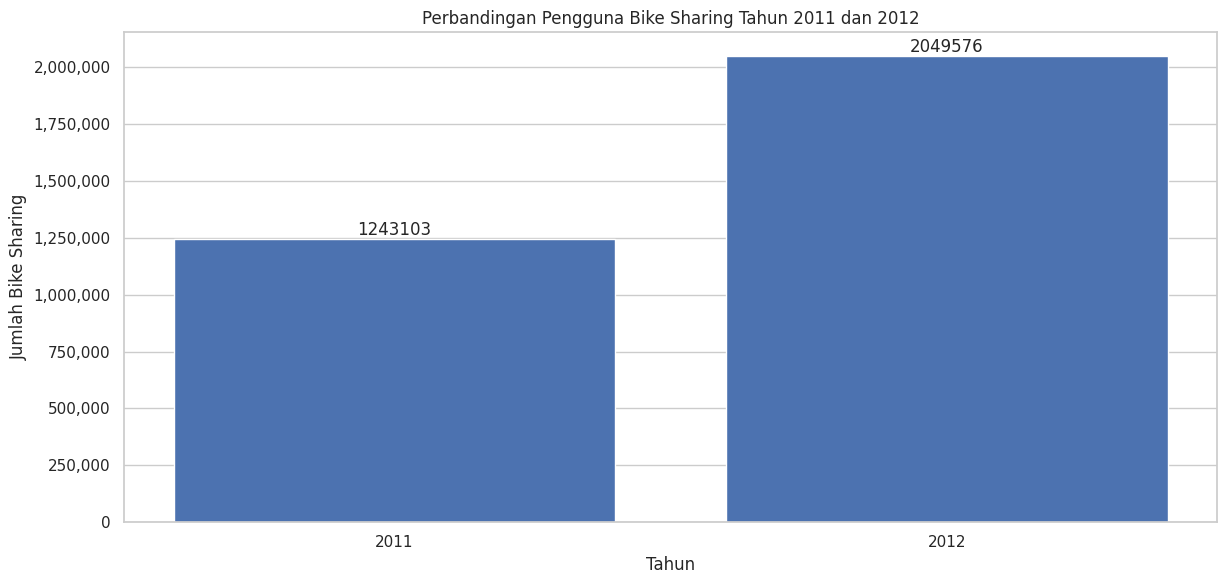

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(tahun_df["dteday"], tahun_df["cnt"])
for i in range(len(tahun_df["dteday"])):
    plt.text(i, tahun_df["cnt"][i],
             str(tahun_df["cnt"][i]),
             ha="center", va="bottom")
plt.title("Perbandingan Pengguna Bike Sharing Tahun 2011 dan 2012")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Bike Sharing")
plt.grid(axis="x")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Pada **tahun 2012** terjadi **lonjakan** yang **sangat besar** **dibandingkan** **tahun 2011**. Pengguna bike sharing pada **tahun 2011** sebesar **1.243.103** pengguna sedangkan **tahun 2012** sebesar **2.049.576** pengguna

### Bagaimana Tren Pengguna Bike Sharing Setiap Bulan?

In [ ]:
bulan_df = day_df.resample("M", on="dteday").sum()
bulan_df = bulan_df.reset_index()
bulan_df["dteday"] = ["Jan 2011", "Feb 2011", "Mar 2011",
                        "Apr 2011", "Mei 2011", "Jun 2011",
                        "Jul 2011", "Agu 2011", "Sep 2011",
                        "Okt 2011", "Nov 2011", "Des 2011",
                        "Jan 2012", "Feb 2012", "Mar 2012",
                        "Apr 2012", "Mei 2012", "Jun 2012",
                        "Jul 2012", "Agu 2012", "Sep 2012",
                        "Okt 2012", "Nov 2012", "Des 2012"]

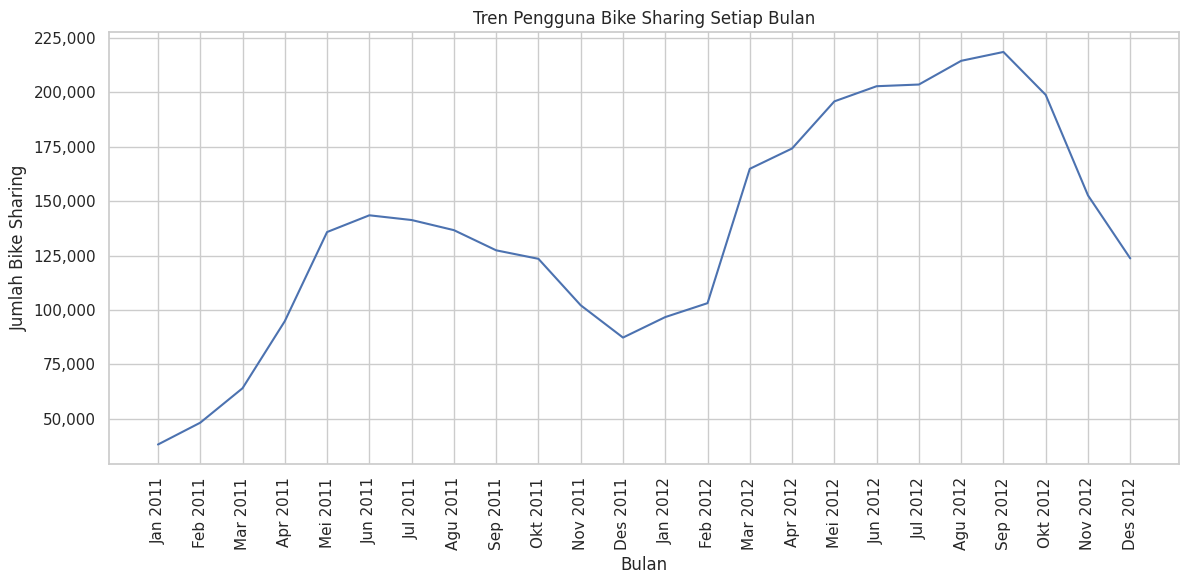

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(bulan_df["dteday"], bulan_df["cnt"])
plt.title("Tren Pengguna Bike Sharing Setiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Bike Sharing")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Tren pengguna bike sharing setiap bulannya pada tahun 2011 dan 2012 cenderung **berfluktuasi**. Tren pengguna bike sharing pada Bulan **Januari 2011** sampai **Juni 2011 meningkat**, sedangkan pada Bulan **Juni 2011** sampai **Desember 2011** cenderung **menurun**. Pada Bulan **Desember 2021** sampai **September 2012** cenderung **meningkat** kembali, namun pada Bulan **September 2012** hingga **Desember 2012** mengalami **penurunan** kembali. **Puncak** pengguna bike sharing terjadi pada Bulan **September 2012**

### Bagaimana Traffic Pengguna Bike Sharing Setiap Jam?

In [31]:
hour_map = {0:'12 am', 1: '01 am', 2: '02 am', 3: '03 am', 4: '04 am',
            5: '05 am', 6: '06 am', 7: '07 am', 8: '08 am', 9: '09 am',
            10: '10 am', 11: '11 am', 12: '12 pm', 13: '01 pm', 14: '02 pm',
            15: '03 pm', 16: '04 pm', 17: '05 pm', 18: '06 pm', 19: '07 pm',
            20: '08 pm', 21: '09 pm', 22: '10 pm', 23: '11 pm'}
hour_df['hr'] = hour_df['hr'].map(hour_map)

In [32]:
total_user_by_hour_df = hour_df.groupby(by=["hr"], observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by='hr', ascending=False)


Text(0, 0.5, 'Waktu')

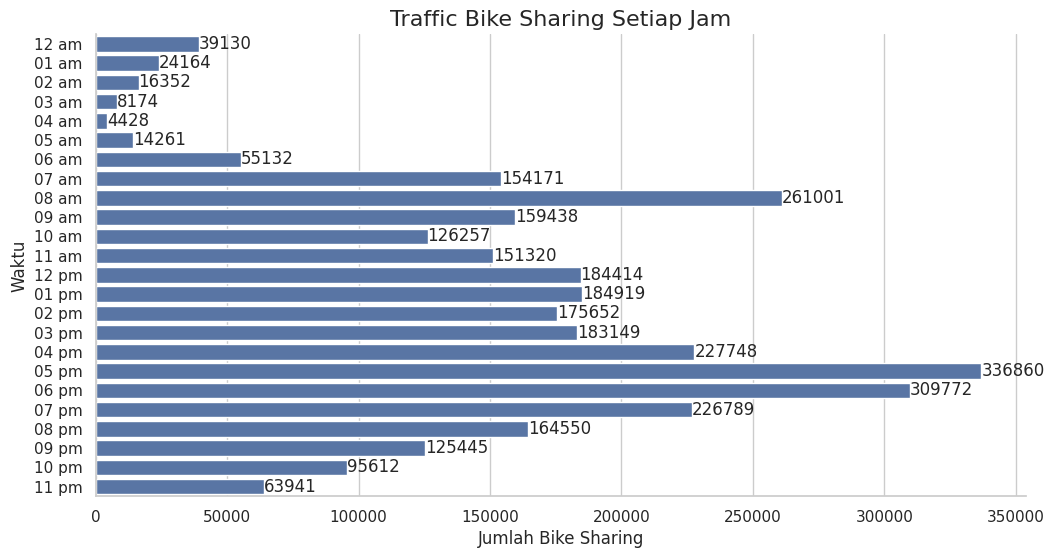

In [33]:
hour_order = ['12 am', '01 am', '02 am', '03 am', '04 am',
            '05 am', '06 am', '07 am', '08 am', '09 am',
            '10 am', '11 am', '12 pm', '01 pm', '02 pm',
            '03 pm', '04 pm', '05 pm', '06 pm', '07 pm',
            '08 pm', '09 pm', '10 pm', '11 pm']

fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(fig)
sns.set(style="whitegrid")
sns.barplot(data=total_user_by_hour_df, x='cnt', y='hr', orient='h', order=hour_order)

for i in ax.containers:
    ax.bar_label(i,fontsize=12)

plt.title("Traffic Bike Sharing Setiap Jam",size=16)
plt.xlabel("Jumlah Bike Sharing",size=12)
plt.ylabel("Waktu",size=12)

Traffic bike sharing **tertinggi** terjadi pada pukul **05 PM** yaitu sebesar **336.860** pengguna, urutan **kedua** pada pukul **06 PM** yaitu sebesar **309.772** pengguna, dan urutan **ketiga** pada pukul **08 AM** yaitu sebesar **261.001** pengguna. Sedangkan traffic bike sharing **terendah** terjadi pada pukul **04 AM** yaitu sebesar **4.428** pengguna

### Bagaimana Komposisi Tipe Pengguna Bike Sharing?

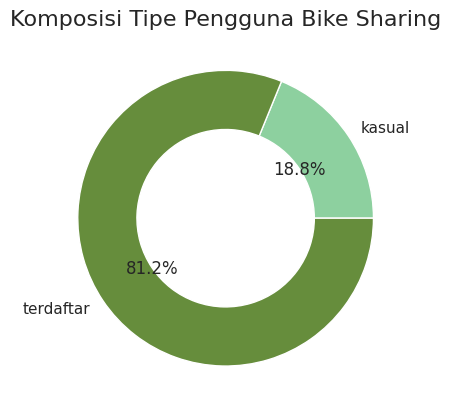

In [45]:
user_composition_df = hour_df[['casual', 'registered']].sum()
casreg_pie = hour_df[['casual', 'registered']].sum()
plt.pie(
    x=casreg_pie,
    labels=('kasual', 'terdaftar'),
    colors=('#8DD09F', '#668D3C'),
    autopct='%1.1f%%',
    wedgeprops = {'width':0.4})
plt.title("Komposisi Tipe Pengguna Bike Sharing", size=16)
plt.show()

Bike sharing lebih di dominasi oleh pengguna yang telah **terdaftar** yaitu sebesar **81.2%** dan sisanya sebesar **18.8%** oleh pengguna **kasual**

### Teknik Analisis Lanjutan

**RFM Analysis**

In [37]:
# Menghitung rfm
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Rec
    'instant': 'count',  # Fre
    'cnt': 'sum'  # Mon
}).reset_index()
# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']
# Menampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


**RFM Analysis** digunakan untuk memahami dan mengelompokkan pelanggan berdasarkan cara berperilaku dalam hal waktu terakhir bertransaksi, frekuensi transaksi, dan nilai transaksi.
- **Recency (R)**: Menunjukkan seberapa baru pelanggan melakukan transaksi.
- **Frequency (F)**: Mengukur seberapa sering pelanggan bertransaksi dalam suatu periode waktu tertentu.
- **Monetary (M)**: Menunjukkan seberapa banyak uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu.

## Conclusion

Berikut merupakan hasil kesimpulan yang diperoleh dari analisis dan visualisasi data yang telah dilakukan :

- Berdasarkan visualisasi *perbandingan pengguna bike sharing tahun 2011 dan 2012* diperoleh kesimpulan bahwa pada **tahun 2012** terjadi **lonjakan** yang **sangat besar** **dibandingkan** **tahun 2011**. Pengguna bike sharing pada **tahun 2011** sebesar **1.243.103** pengguna sedangkan **tahun 2012** sebesar **2.049.576** pengguna.
- Berdasarkan visualisasi *tren pengguna bike sharing setiap bulan* diperoleh kesimpulan bahwa tren pengguna bike sharing setiap bulannya pada tahun 2011 dan 2012 cenderung **berfluktuasi**. Tren pengguna bike sharing pada Bulan **Januari 2011** sampai **Juni 2011 meningkat**, sedangkan pada Bulan **Juni 2011** sampai **Desember 2011** cenderung **menurun**. Pada Bulan **Desember 2021** sampai **September 2012** cenderung **meningkat** kembali, namun pada Bulan **September 2012** hingga **Desember 2012** mengalami **penurunan** kembali. **Puncak** pengguna bike sharing terjadi pada Bulan **September 2012** sebesar.
- Berdasarkan visualisasi *traffic bike sharing setiap jam* diperoleh kesimpulan bahwa traffic bike sharing **tertinggi** terjadi pada pukul **05 PM** yaitu sebesar **336.860** pengguna, urutan **kedua** pada pukul **06 PM** yaitu sebesar **309.772** pengguna, dan urutan **ketiga** pada pukul **08 AM** yaitu sebesar **261.001** pengguna. Sedangkan traffic bike sharing **terendah** terjadi pada pukul **04 AM** yaitu sebesar **4.428** pengguna.
- Berdasarkan visualisasi *komposisi tipe pengguna bike sharing* diperoleh kesimpulan bahwa bike sharing lebih di dominasi oleh pengguna yang telah **terdaftar** yaitu sebesar **81.2%** dan sisanya sebesar **18.8%** oleh pengguna **kasual**.
Berdasarkan teknik analisis lanjutan, **RFM Analysis** digunakan untuk memahami dan mengelompokkan pelanggan berdasarkan cara berperilaku dalam hal waktu terakhir bertransaksi, frekuensi transaksi, dan nilai transaksi.
- **Recency (R)**: Menunjukkan seberapa baru pelanggan melakukan transaksi.
- **Frequency (F)**: Mengukur seberapa sering pelanggan bertransaksi dalam suatu periode waktu tertentu.
- **Monetary (M)**: Menunjukkan seberapa banyak uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu.